# Apprentissage Profond pour la Réduction de Dimension

In [1]:
print(__doc__)

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
import numpy as np
from scipy.io import loadmat
from sklearn.decomposition import PCA
import keras
from sklearn.metrics.pairwise import euclidean_distances
from scipy.sparse.linalg import eigs as sparse_eigs

Automatically created module for IPython interactive environment


Using TensorFlow backend.


# Load Dataset

In [2]:
Axes3D
Data,target=loadmat("Hepta.mat")["fea"],loadmat("Hepta.mat")["gnd"]

In [3]:
X, color = Data,target.reshape(target.shape[0],)
n_neighbors = 10
n_components = 2


# Data normalisation

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

# Deep AutoEncoder

In [5]:
#Auto Encoder 
input_layer = keras.layers.Input(shape=(X.shape[1],))
encoder=keras.layers.Dense(2,activation="linear")(input_layer)

decoder=keras.layers.Dense(X.shape[1],activation="linear")(encoder)
encoder=keras.Model(input_layer,encoder)

Autoencoder=keras.Model(input_layer,decoder)
Autoencoder.compile(optimizer="Adadelta",loss="mean_squared_logarithmic_error")


In [6]:
Autoencoder.fit(X,X,validation_split=0.25,epochs=150)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 159 samples, validate on 53 samples
Epoch 1/150





159/159 [==============================] - 1s 7ms/step - loss: 0.2206 - val_loss: 0.1241
Epoch 2/150
159/159 [==============================] - 0s 96us/step - loss: 0.2138 - val_loss: 0.1256
Epoch 3/150
159/159 [==============================] - 0s 157us/step - loss: 0.2074 - val_loss: 0.1268
Epoch 4/150
159/159 [==============================] - 0s 112us/step - loss: 0.2016 - val_loss: 0.1276
Epoch 5/150
159/159 [==============================] - 0s 103us/step - loss: 0.1962 - val_loss: 0.1282
Epoch 6/150
159/159 [==============================] - 0s 138us/step - loss: 0.1910 - val_loss: 0.1287
Epoch 7/150
159/159 [==============================] - 0s 82us/step - loss: 0.1862 - val_loss: 0.1288
Epoch 8/150
159/159 [==============================] - 0s 145us/step - loss: 0.1817 - val_loss: 0.1288
Epoch 9/150
159/159 [============

Epoch 139/150
159/159 [==============================] - 0s 152us/step - loss: 0.0827 - val_loss: 0.1558
Epoch 140/150
159/159 [==============================] - 0s 106us/step - loss: 0.0826 - val_loss: 0.1557
Epoch 141/150
159/159 [==============================] - 0s 176us/step - loss: 0.0825 - val_loss: 0.1556
Epoch 142/150
159/159 [==============================] - 0s 98us/step - loss: 0.0825 - val_loss: 0.1555
Epoch 143/150
159/159 [==============================] - 0s 112us/step - loss: 0.0824 - val_loss: 0.1555
Epoch 144/150
159/159 [==============================] - 0s 88us/step - loss: 0.0823 - val_loss: 0.1553
Epoch 145/150
159/159 [==============================] - 0s 180us/step - loss: 0.0823 - val_loss: 0.1551
Epoch 146/150
159/159 [==============================] - 0s 130us/step - loss: 0.0822 - val_loss: 0.1550
Epoch 147/150
159/159 [==============================] - 0s 138us/step - loss: 0.0822 - val_loss: 0.1549
Epoch 148/150
159/159 [==============================] - 

# Locally linear embedding

In [7]:
def LLE_transform(k_neighbors,X,n_components):
        
        n_samples = X.shape[1]
  
        dist_mat = euclidean_distances(np.transpose(X))
      
        neighbors = np.argsort(dist_mat, axis = 1)[:, 1 : k_neighbors + 1]
        
        W = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            mat_z = X[i] - X[neighbors[i]]
            mat_c = np.dot(mat_z, mat_z.transpose())
            w = np.linalg.solve(mat_c, np.ones(mat_c.shape[0]))
            W[i, neighbors[i]] = w / w.sum()
        

        eigen_values, eigen_vectors = np.linalg.eig(W)
        
        embedded_matrix=X.dot(eigen_vectors[:,:n_components])
        return embedded_matrix

# PCA, MDS, LLE, Eigenmaps, ISOMAP et Deep AE visual

Isomap: 0.018 sec
MDS: 0.13 sec


/home/hamoud/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Eigenmaps: 0.046 sec
Auto encoder: 0.039 sec


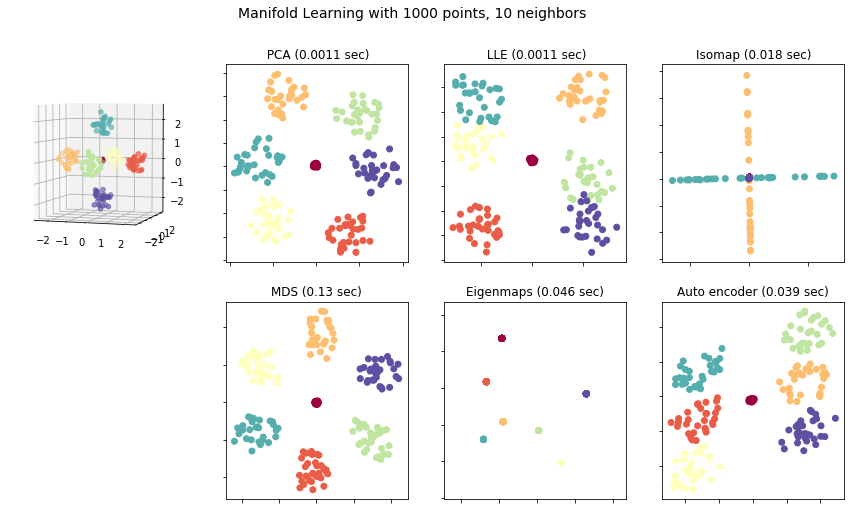

In [8]:
fig = plt.figure(figsize=(15, 8))
plt.suptitle("PCA, MDS, LLE, Eigenmaps, ISOMAP et Deep AE visualisation and Test"
             % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(241, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

t0 = time()
Y = PCA(n_components=n_components).fit_transform(X)
t1 = time()
ax = fig.add_subplot(242)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title(" PCA (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')



t0 = time()
Y=LLE_transform(n_neighbors,X,n_components)
t1 = time()
ax = fig.add_subplot(243)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title(" LLE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(244)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(246)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X)
t1 = time()
print("Eigenmaps: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(247)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Eigenmaps (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()

Y = encoder.predict(X)
t1 = time()
print("Auto encoder: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(248)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Auto encoder (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

# Get S from LLE

In [9]:
def Get_S(k_neighbors, X):
        
        n_samples = X.shape[0]
  
        dist_mat = euclidean_distances(X)
      
        neighbors = np.argsort(dist_mat, axis = 1)[:, 1 : k_neighbors + 1]
        
        W = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            mat_z = X[i] - X[neighbors[i]]
            mat_c = np.dot(mat_z, mat_z.transpose())
            w = np.linalg.solve(mat_c, np.ones(mat_c.shape[0]))
            W[i, neighbors[i]] = w / w.sum()
        

        eigen_values, eigen_vectors = np.linalg.eig(W)
        
     
        return eigen_values, eigen_vectors,W

In [10]:
eigen_values, eigen_vectors,S=Get_S(2,np.transpose(X))

In [11]:
eigen_vectors[:,:2]

array([[-0.57735027, -0.7823764 ],
       [-0.57735027,  0.15533008],
       [-0.57735027,  0.60312498]])

In [12]:
YS=X.dot(eigen_vectors[:,:2])

# Get I From the AutoEncoder

In [13]:
ss=Autoencoder.get_weights()
θ1=ss[0]
θ2=ss[2]
I=θ1.dot(θ2)

# f θ 1 (X)

In [14]:
YI=encoder.predict(X)

# M = (I − S)T *(I − S)

In [15]:
M=np.transpose(I-S).dot(I-S)

# B = eigs(M)

In [16]:
_, B = np.linalg.eig(M)

# B: embedding matrix

In [17]:
YB=X.dot(B[:,:2])

# Visualisation of results 

(-2.347816789361646, 2.170201160979478, -2.3951467760428526, 2.365705609893272)

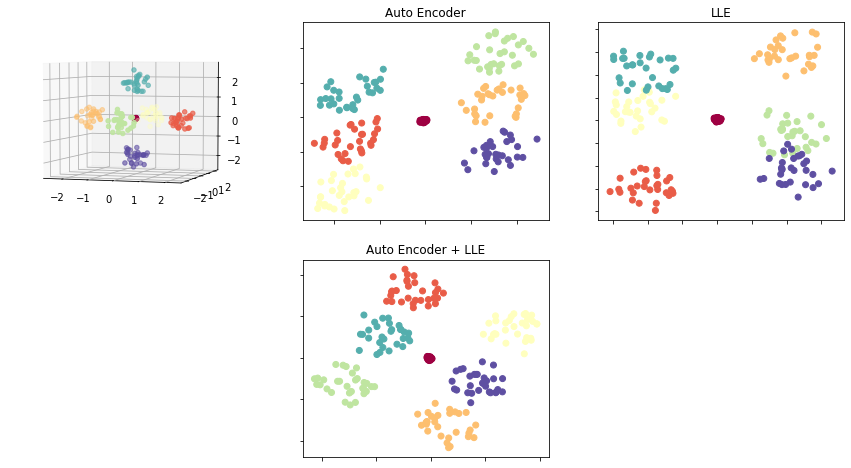

In [18]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(231, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

ax = fig.add_subplot(232)
plt.scatter(YI[:, 0], YI[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Auto Encoder" )
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

ax = fig.add_subplot(233)
plt.scatter(YS[:, 0], YS[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("LLE" )
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

ax = fig.add_subplot(235)
plt.scatter(YB[:, 0], YB[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Auto Encoder + LLE" )
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


# Clusturing

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score as ARI
from sklearn.metrics import normalized_mutual_info_score as NMI

In [20]:
#Kmeans for real Data 
km=KMeans(n_clusters=target.max()).fit(X)
print('ARI =',ARI(target.reshape(target.shape[0],),km.labels_))
print('NMI =',NMI(target.reshape(target.shape[0],),km.labels_))

ARI = 1.0
NMI = 1.0


/home/hamoud/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [21]:
#Kmeans for LLE result
km=KMeans(n_clusters=target.max()).fit(YS)
print('ARI =',ARI(target.reshape(target.shape[0],),km.labels_))
print('NMI =',NMI(target.reshape(target.shape[0],),km.labels_))

ARI = 0.8480141106785734
NMI = 0.901902723284939


/home/hamoud/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [22]:
#Kmeans for AE result
km=KMeans(n_clusters=target.max()).fit(YI)
print('ARI =',ARI(target.reshape(target.shape[0],),km.labels_))
print('NMI =',NMI(target.reshape(target.shape[0],),km.labels_))

ARI = 0.9889720708150043
NMI = 0.9893298598439363


/home/hamoud/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [23]:
#Kmeans for AE + LLEresult
km=KMeans(n_clusters=target.max()).fit(YB)
print('ARI =',ARI(target.reshape(target.shape[0],),km.labels_))
print('NMI =',NMI(target.reshape(target.shape[0],),km.labels_))

ARI = 1.0
NMI = 1.0


/home/hamoud/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


# 